**Assignment12**

***Assignment12 - Polynomial fit with a regularization***

Name: Seyeong Lee

Student ID: 20150596


Github[https://github.com/seyeong3131/Assignment12.git](https://github.com/seyeong3131/Assignment12.git)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

num     = 1001
std     = 5 

# x  : x-coordinate data
# y1 : (clean) y-coordinate data 
# y2 : (noisy) y-coordinate data

def fun(x):
 
	# f = np.sin(x) * (1 / (1 + np.exp(-x))) 
	f = np.abs(x) * np.sin(x)

	return f

n       = np.random.rand(num)
nn      = n - np.mean(n)
x       = np.linspace(-10,10,num)
y1      = fun(x) 			# clean points
y2      = y1 + nn * std		# noisy points

plt.plot(x, y1, 'b.', x, y2, 'k.')
plt.show()

<Figure size 640x480 with 1 Axes>

In [2]:
def defA(p,x):
    res = np.zeros((p+1,num))
    for i in range(p):
        res[i+1] = x**(i+1)
    res[0] = 1
    return np.matrix(np.transpose(res))

def appendA(A,p,ratio):
    return np.matrix(np.append(A,np.identity(p)*np.sqrt(ratio),axis=0))

def appendB(B,p):
    return np.matrix(np.append(B,np.zeros((p))))

def energy(f_hat,y,r,t):
    return sum((f_hat - y)**2) + r*sum(t**2)




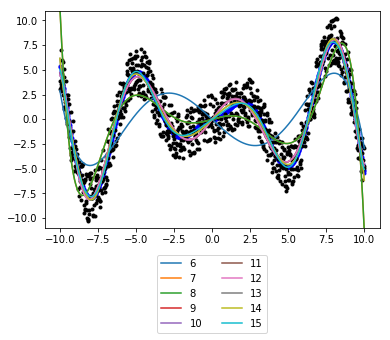

In [3]:
resi_x = range(6,16)
resi_y = np.zeros((10))

plt.plot(x, y1, 'b.', x, y2, 'k.')
for i in range(6,16): #6~15
    A = defA(i,x)
    A = appendA(np.asarray(A),i+1,1)
    B = np.matrix(y1)
    B = appendB(np.asarray(B),i+1)

    theta = (A.T * A).I*A.T*B.T
    theta = np.asarray(theta)
    
    
#     print(theta)
#     print(theta.shape)

    approx = 0
    for j in range(len(theta)):
        approx += theta[j][0] * x**(j)

    resi_y[i-6] = energy(approx,y1,1,theta)
    plt.plot(x, approx, label=str(i))
    plt.axis([-11,11,-11,11])
    
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.1), ncol=2)
plt.show()

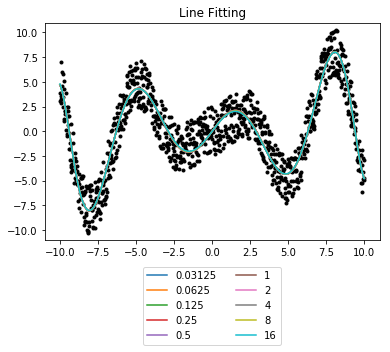

In [4]:
plt.plot(x, y2, 'k.')


for i in range(10): #0.125~8
    l = 2**(i-5)
    A = defA(10,x)
    A = appendA(np.asarray(A),11,l)
    B = np.matrix(y1)
    B = appendB(np.asarray(B),11)

    theta = np.dot(np.linalg.pinv(A),B.T)
    theta = np.asarray(theta)
    

    
#     print(theta)
#     print(theta.shape)

    approx = 0
    for j in range(len(theta)):
        approx += theta[j][0] * x**(j)

    resi_y[i] = energy(approx,y1,l,theta)
    plt.plot(x, approx, label = str(l))
    plt.axis([-11,11,-11,11])
    plt.title("Line Fitting")
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.1), ncol=2)
plt.show()


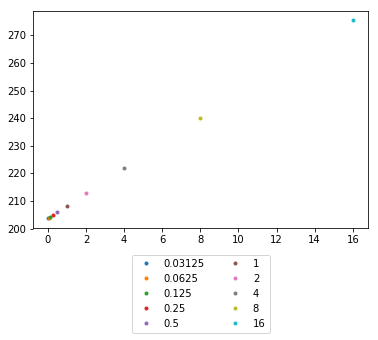

In [5]:
for i in range(10):
    ratio = 2**(i-5)
    plt.plot(ratio,resi_y[i],".",label = str(ratio))
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.1), ncol=2)
plt.show()